**Part 1. AI Agent 이해와 입문 프로젝트**

- Chapter 03. LangGraph 입문 프로젝트

    - **📒[실습]** Clip 02. Tool Calling - 웹검색을 하는 챗봇 만들기

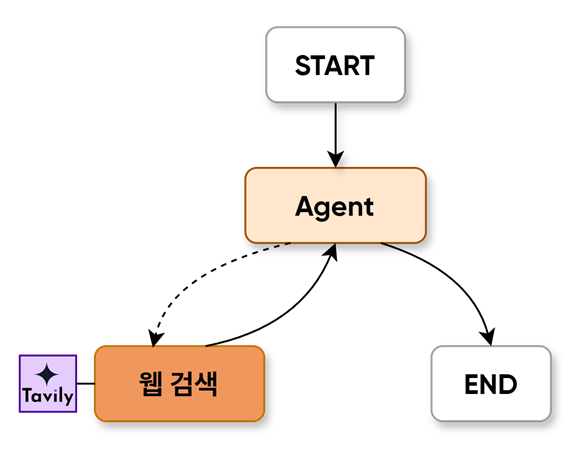

## Tavily Search API 사용하기

📒 Tavily Search Documents : https://docs.tavily.com/documentation/about

🗝️ API Key 발급하기 : https://app.tavily.com/home


✅ 파이썬 Tavily SDK 설치 : 
```
pip install -U tavily-python
```

In [1]:
import getpass
import os


def _set_env(var: str):
    if not os.environ.get(var):
        os.environ[var] = getpass.getpass(f"{var}: ")


_set_env("OPENAI_API_KEY")
_set_env("TAVILY_API_KEY")

In [2]:
from tavily import TavilyClient

tavily_client = TavilyClient()

**search**

- Return : dict with all related response fields

In [3]:
response = tavily_client.search("What is AI Agent?", max_results=3) # , topic="news", days = 10
print(response)

{'query': 'What is AI Agent?', 'follow_up_questions': None, 'answer': None, 'images': [], 'results': [{'title': 'What is an AI agent? - McKinsey & Company', 'url': 'https://www.mckinsey.com/featured-insights/mckinsey-explainers/what-is-an-ai-agent', 'content': 'An AI agent is a software component that has the agency to act on behalf of a user or a system to perform tasks.Users can organize agents into systems that can orchestrate complex workflows, coordinate activities among multiple agents, apply logic to thorny problems, and evaluate answers to user queries.', 'score': 0.959766, 'raw_content': None}, {'title': 'What are AI Agents?- Agents in Artificial Intelligence Explained - AWS', 'url': 'https://aws.amazon.com/what-is/ai-agents/', 'content': 'What are AI Agents?- Agents in Artificial Intelligence Explained - AWS What are AI Agents? What are AI Agents? How can AWS help with your AI agent requirements? What are AI Agents? An artificial intelligence (AI) agent is a software program 

In [4]:
response['results']

[{'title': 'What is an AI agent? - McKinsey & Company',
  'url': 'https://www.mckinsey.com/featured-insights/mckinsey-explainers/what-is-an-ai-agent',
  'content': 'An AI agent is a software component that has the agency to act on behalf of a user or a system to perform tasks.Users can organize agents into systems that can orchestrate complex workflows, coordinate activities among multiple agents, apply logic to thorny problems, and evaluate answers to user queries.',
  'score': 0.959766,
  'raw_content': None},
 {'title': 'What are AI Agents?- Agents in Artificial Intelligence Explained - AWS',
  'url': 'https://aws.amazon.com/what-is/ai-agents/',
  'content': 'What are AI Agents?- Agents in Artificial Intelligence Explained - AWS What are AI Agents? What are AI Agents? How can AWS help with your AI agent requirements? What are AI Agents? An artificial intelligence (AI) agent is a software program that can interact with its environment, collect data, and use the data to perform self-d

**get_search_context**

- Return : str containing the content and sources of the results

In [5]:
context = tavily_client.get_search_context(query="What is AI Agent?")
print(context)

[{"url": "https://www.ibm.com/think/topics/ai-agents", "content": "The agent's ability to store past interactions in memory and plan future actions encourages a personalized experience and comprehensive responses.1\u00a0This tool calling can be achieved without human intervention and broadens the possibilities for real-world applications of these AI systems. The user that provides the\u00a0AI agent\u00a0with specific goals to accomplish and establishes available tools to use. Given the user's goals and the agent\u2019s available tools, the\u00a0AI agent\u00a0then performs task decomposition to improve performance.3\u00a0Essentially, the agent creates a plan of\u00a0specific tasks\u00a0and subtasks to accomplish the complex goal. In contrast,\u00a0agentic AI chatbots learn to adapt to user expectations over time, providing a more personalized experience and comprehensive responses."}, {"url": "https://www.mckinsey.com/featured-insights/mckinsey-explainers/what-is-an-ai-agent", "content"

**qna_search**

- Return : str, containing a short answer to the search query

In [6]:
answer = tavily_client.qna_search(query="What is AI Agent?")
print(answer)

An AI agent is a software system that autonomously performs tasks, makes decisions, and adapts based on data and feedback. They operate independently to automate processes and improve efficiency. AI agents can coordinate with other systems to manage complex workflows.


## LangChain에서 Tavily Search 를 Tool(도구) 로 사용하기

- Tool that queries the Tavily Search API and gets back json


**1) TavilySearch**

- https://python.langchain.com/docs/integrations/tools/tavily_search/

파라미터 :

- `max_results` (optional, int): 검색 결과 반환 수

- `topic` (optional, str): 검색 카테고리 / "general"(Default), "news", "finance"

- `include_answer` (optional, bool): 쿼리에 대한 답변 포함 여부

- `include_raw_content` (optional, bool): 결과 HTML 포함 여부

- `include_images` (optional, bool): 쿼리 관련 이미지 목록 포함 여부

- `include_image_descriptions` (optional, bool): 각 이미지에 대한 설명 텍스트 포함 여부

- `search_depth` (optional, str): 검색 깊이 / "basic"(Default),"advanced"

- `time_range` (optional, str): 필터링 날짜 범위 - "day", "week", "month", "year"

- `include_domains` (optional, List[str]): 구체적으로 포함할 도메인 목록

- `exclude_domains` (optional, List[str]): 구체적으로 제외할 도메인 목록

In [7]:
from langchain_tavily import TavilySearch

tool = TavilySearch(max_results=3)
tool.invoke("What's a 'node' in LangGraph?")

{'query': "What's a 'node' in LangGraph?",
 'follow_up_questions': None,
 'answer': None,
 'images': [],
 'results': [{'title': "Introduction to LangGraph: A Beginner's Guide - Medium",
   'url': 'https://medium.com/@cplog/introduction-to-langgraph-a-beginners-guide-14f9be027141',
   'content': 'Stateful Graph: LangGraph revolves around the concept of a stateful graph, where each node in the graph represents a step in your computation, and the graph maintains a state that is passed around and updated as the computation progresses. LangGraph supports conditional edges, allowing you to dynamically determine the next node to execute based on the current state of the graph. We define nodes for classifying the input, handling greetings, and handling search queries. def classify_input_node(state): LangGraph is a versatile tool for building complex, stateful applications with LLMs. By understanding its core concepts and working through simple examples, beginners can start to leverage its powe

In [8]:
invoke_with_toolcall = tool.invoke({"args": {'query': "What's a 'node' in LangGraph?"}, "type": "tool_call", "id": "foo", "name": "tavily_search"})

In [9]:
invoke_with_toolcall

ToolMessage(content='{"query": "What\'s a \'node\' in LangGraph?", "follow_up_questions": null, "answer": null, "images": [], "results": [{"title": "Introduction to LangGraph: A Beginner\'s Guide - Medium", "url": "https://medium.com/@cplog/introduction-to-langgraph-a-beginners-guide-14f9be027141", "content": "Stateful Graph: LangGraph revolves around the concept of a stateful graph, where each node in the graph represents a step in your computation, and the graph maintains a state that is passed around and updated as the computation progresses. LangGraph supports conditional edges, allowing you to dynamically determine the next node to execute based on the current state of the graph. We define nodes for classifying the input, handling greetings, and handling search queries. def classify_input_node(state): LangGraph is a versatile tool for building complex, stateful applications with LLMs. By understanding its core concepts and working through simple examples, beginners can start to le

In [10]:
invoke_with_toolcall.content

'{"query": "What\'s a \'node\' in LangGraph?", "follow_up_questions": null, "answer": null, "images": [], "results": [{"title": "Introduction to LangGraph: A Beginner\'s Guide - Medium", "url": "https://medium.com/@cplog/introduction-to-langgraph-a-beginners-guide-14f9be027141", "content": "Stateful Graph: LangGraph revolves around the concept of a stateful graph, where each node in the graph represents a step in your computation, and the graph maintains a state that is passed around and updated as the computation progresses. LangGraph supports conditional edges, allowing you to dynamically determine the next node to execute based on the current state of the graph. We define nodes for classifying the input, handling greetings, and handling search queries. def classify_input_node(state): LangGraph is a versatile tool for building complex, stateful applications with LLMs. By understanding its core concepts and working through simple examples, beginners can start to leverage its power for

**2) TavilySearchResults**

- https://python.langchain.com/api_reference/community/tools/langchain_community.tools.tavily_search.tool.TavilySearchResults.html


In [11]:
from langchain_community.tools.tavily_search import TavilySearchResults

tool = TavilySearchResults(max_results=2)
tool.invoke("What's a 'node' in LangGraph?")

[{'title': 'LangGraph Glossary - GitHub Pages',
  'url': 'https://langchain-ai.github.io/langgraph/concepts/low_level/',
  'content': 'In LangGraph, nodes are typically python functions (sync or async) where the first positional argument is the state, and (optionally), the second positional argument is a "config", containing optional configurable parameters (such as a thread_id).\n\nSimilar to NetworkX, you add these nodes to a graph using the add_node method:\n\nAPI Reference: RunnableConfig | StateGraph [...] LangGraph Glossary¶\n\nGraphs¶\n\nAt its core, LangGraph models agent workflows as graphs. You define the behavior of your agents using three key components:\n\nState: A shared data structure that represents the current snapshot of your application. It can be any Python type, but is typically a TypedDict or Pydantic BaseModel.\n\nNodes: Python functions that encode the logic of your agents. They receive the current State as input, perform some computation or side-effect, and ret

In [12]:
invoke_with_toolcall = tool.invoke({"args": {'query': "What's a 'node' in LangGraph?"}, "type": "tool_call", "id": "foo", "name": "tavily"})

In [13]:
invoke_with_toolcall

ToolMessage(content='[{"title": "LangGraph Glossary - GitHub Pages", "url": "https://langchain-ai.github.io/langgraph/concepts/low_level/", "content": "In LangGraph, nodes are typically python functions (sync or async) where the first positional argument is the state, and (optionally), the second positional argument is a \\"config\\", containing optional configurable parameters (such as a thread_id).\\n\\nSimilar to NetworkX, you add these nodes to a graph using the add_node method:\\n\\nAPI Reference: RunnableConfig | StateGraph [...] LangGraph Glossary¶\\n\\nGraphs¶\\n\\nAt its core, LangGraph models agent workflows as graphs. You define the behavior of your agents using three key components:\\n\\nState: A shared data structure that represents the current snapshot of your application. It can be any Python type, but is typically a TypedDict or Pydantic BaseModel.\\n\\nNodes: Python functions that encode the logic of your agents. They receive the current State as input, perform some co

In [14]:
invoke_with_toolcall.content

'[{"title": "LangGraph Glossary - GitHub Pages", "url": "https://langchain-ai.github.io/langgraph/concepts/low_level/", "content": "In LangGraph, nodes are typically python functions (sync or async) where the first positional argument is the state, and (optionally), the second positional argument is a \\"config\\", containing optional configurable parameters (such as a thread_id).\\n\\nSimilar to NetworkX, you add these nodes to a graph using the add_node method:\\n\\nAPI Reference: RunnableConfig | StateGraph [...] LangGraph Glossary¶\\n\\nGraphs¶\\n\\nAt its core, LangGraph models agent workflows as graphs. You define the behavior of your agents using three key components:\\n\\nState: A shared data structure that represents the current snapshot of your application. It can be any Python type, but is typically a TypedDict or Pydantic BaseModel.\\n\\nNodes: Python functions that encode the logic of your agents. They receive the current State as input, perform some computation or side-ef

In [15]:
invoke_with_toolcall.artifact

{'query': "What's a 'node' in LangGraph?",
 'follow_up_questions': None,
 'answer': None,
 'images': [],
 'results': [{'url': 'https://langchain-ai.github.io/langgraph/concepts/low_level/',
   'title': 'LangGraph Glossary - GitHub Pages',
   'content': 'In LangGraph, nodes are typically python functions (sync or async) where the first positional argument is the state, and (optionally), the second positional argument is a "config", containing optional configurable parameters (such as a thread_id).\n\nSimilar to NetworkX, you add these nodes to a graph using the add_node method:\n\nAPI Reference: RunnableConfig | StateGraph [...] LangGraph Glossary¶\n\nGraphs¶\n\nAt its core, LangGraph models agent workflows as graphs. You define the behavior of your agents using three key components:\n\nState: A shared data structure that represents the current snapshot of your application. It can be any Python type, but is typically a TypedDict or Pydantic BaseModel.\n\nNodes: Python functions that enc

-> 모델을 위한 도구 출력 부분(ToolMessage.content) + 모델 외부에서 사용하기 위한 부분(ToolMessage.artifact)

### **Tool (도구) 바인딩하기**

- LLM이 질문에 적합한 Tool을 호출하기

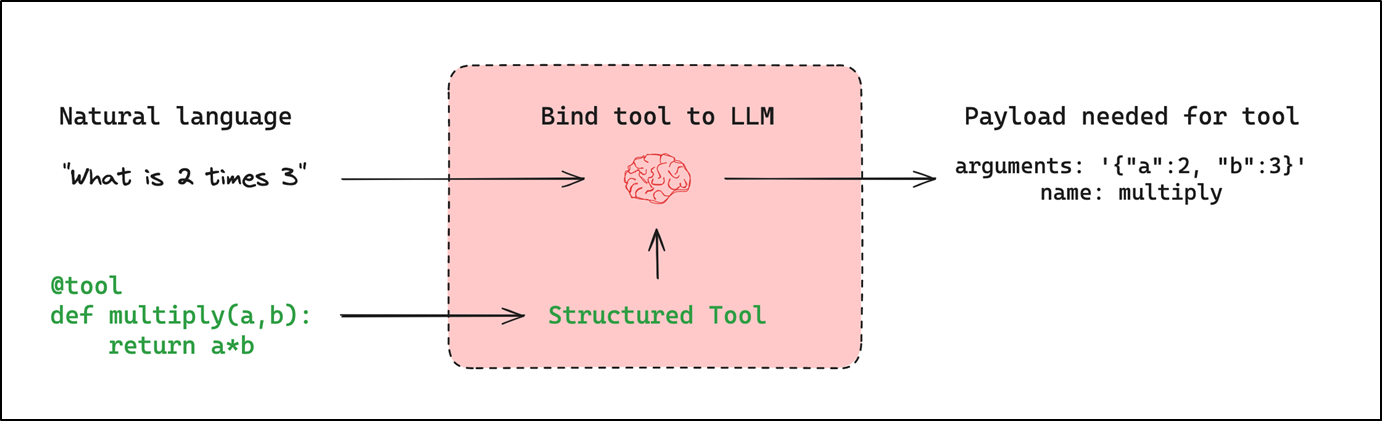

In [16]:
from langchain_core.tools import tool

@tool
def add(a: int, b: int) -> int:
    """Adds a and b.

    Args:
        a: first int
        b: second int
    """
    return a + b

@tool
def multiply(a: int, b: int) -> int:
    """Multiplies a and b.

    Args:
        a: first int
        b: second int
    """
    return a * b

tools = [add, multiply]

In [17]:
from langchain_openai import ChatOpenAI

llm = ChatOpenAI(model="gpt-4o")
llm_with_tools = llm.bind_tools(tools)

In [18]:
query = "What is 3 * 12? Also, what is 11 + 49?"

llm_with_tools.invoke(query).tool_calls

[{'name': 'multiply',
  'args': {'a': 3, 'b': 12},
  'id': 'call_gu93H41dqbUL1HPX2askMIsf',
  'type': 'tool_call'},
 {'name': 'add',
  'args': {'a': 11, 'b': 49},
  'id': 'call_i6ZFCEuwcPNWjw03h8gOVq4O',
  'type': 'tool_call'}]

In [19]:
query = "What is 12 % 2?"

llm_with_tools.invoke(query).tool_calls

[]

### **Tavily Search 적용하기**

In [20]:
from langchain_openai import ChatOpenAI

tool = TavilySearch(max_results=2)
tools = [tool]

llm = ChatOpenAI(model="gpt-4o")
llm_with_tools = llm.bind_tools(tools) # TavilySearch(tools) 을 호출할 수 있도록 함

In [21]:
llm_with_tools.invoke("안녕")

AIMessage(content='안녕하세요! 어떻게 도와드릴까요?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 12, 'prompt_tokens': 769, 'total_tokens': 781, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_a6889ffe71', 'id': 'chatcmpl-BP1Z2UYxazl6t65QNZc2UD7lsRbuH', 'finish_reason': 'stop', 'logprobs': None}, id='run-fc49da6e-34fc-4235-b0d1-fe0c45ed5d76-0', usage_metadata={'input_tokens': 769, 'output_tokens': 12, 'total_tokens': 781, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

In [22]:
llm_with_tools.invoke("What is Langgraph?")

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_pJk2wVVp4txWlbRnw2MiCxHU', 'function': {'arguments': '{"query":"Langgraph"}', 'name': 'tavily_search'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 18, 'prompt_tokens': 772, 'total_tokens': 790, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_a6889ffe71', 'id': 'chatcmpl-BP1ZQkkwiYX2LO8EZzaarP1VZwtMH', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-b3c19276-241d-4845-afb4-2f80b2ce2fb2-0', tool_calls=[{'name': 'tavily_search', 'args': {'query': 'Langgraph'}, 'id': 'call_pJk2wVVp4txWlbRnw2MiCxHU', 'type': 'tool_call'}], usage_metadata={'input_tokens': 772, 'output_tokens': 18, 'total_tokens': 790, 'input_token_details': {'audio': 0, 'cache_rea

In [23]:
llm_with_tools.invoke("What is Langgraph?").tool_calls

[{'name': 'tavily_search',
  'args': {'query': 'Langgraph'},
  'id': 'call_uo9lHWEs65SOFY39rEu22UzC',
  'type': 'tool_call'}]

## 웹 검색을 기반으로 답변하는 LLM 챗봇 만들기

- Tool을 호출하고 그 결과를 모델(LLM)로 전달하기

**chatbot** 노드 추가하기

In [24]:
from typing import Annotated
from typing_extensions import TypedDict

from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages

class State(TypedDict):
    messages: Annotated[list, add_messages]

graph_builder = StateGraph(State)

def chatbot(state: State):
    return {"messages": [llm_with_tools.invoke(state["messages"])]} # 일반적인 질문에 대한 일반 답변 or tool_calls

graph_builder.add_node("chatbot", chatbot)

**tools** 노드 추가하기

In [25]:
import json
from langchain_core.messages import ToolMessage
from langgraph.prebuilt import ToolNode

class BasicToolNode:
    """
        A node that runs the tools requested in the last AIMessage.
        마지막 AIMessage에서 요청된 도구를 실행하는 노드
    """

    def __init__(self, tools: list) -> None:
        self.tools_by_name = {tool.name: tool for tool in tools} # ["tavily_search" : TavilySearch()]

    def __call__(self, inputs: dict):
        if messages := inputs.get("messages", []):
            message = messages[-1] # 마지막 message
        else:
            raise ValueError("No message found in input")
        
        outputs = []
        for tool_call in message.tool_calls: # 메시지에서 호출된 도구를 불러옴
            tool_result = self.tools_by_name[tool_call["name"]].invoke( # Tool 호출 실행
                tool_call["args"]
            )
            outputs.append( # Tool 호출 결과(ToolMessage) 추가
                ToolMessage(
                    content=json.dumps(tool_result),
                    name=tool_call["name"],
                    tool_call_id=tool_call["id"],
                )
            )
        return {"messages": outputs}

tool_node = BasicToolNode(tools=[tool])
# tool_node = ToolNode(tools=[tool])
graph_builder.add_node("tools", tool_node)

- `ToolNode`(langgraph.prebuilt) : 마지막 AIMessage에서 호출된 도구를 실행하는 노드

**조건부 엣지, 라우팅 (add_conditional_edges)** 추가하기

In [26]:
def route_tools(
    state: State,
):
    """
    Use in the conditional_edge to route to the ToolNode if the last message
    has tool calls. Otherwise, route to the end.
    마지막 메시지에 도구 호출이 있는 경우, conditional_edge에서 ToolNode로 라우팅하고 그렇지 않으면 END로 라우팅
    """
    if isinstance(state, list):
        ai_message = state[-1]
    elif messages := state.get("messages", []):
        ai_message = messages[-1]
    else:
        raise ValueError(f"No messages found in input state to tool_edge: {state}")
    
    if hasattr(ai_message, "tool_calls") and len(ai_message.tool_calls) > 0:
        return "tools"
    return END


graph_builder.add_conditional_edges(
    "chatbot",
    route_tools,
    {"tools": "tools", END: END},
)

In [27]:
# 엣지 연결
graph_builder.add_edge("tools", "chatbot") # 도구가 호출될 때마다 챗봇으로 돌아가 다음 단계를 결정
graph_builder.add_edge(START, "chatbot")
graph = graph_builder.compile()

**그래프 시각화**

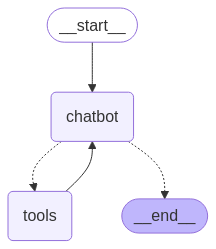

In [28]:
from IPython.display import Image, display

display(Image(graph.get_graph().draw_mermaid_png()))

**실행**

In [29]:
def stream_graph_updates(user_input: str):
    for event in graph.stream({"messages": [{"role": "user", "content": user_input}]}): # graph 노드 호출 결과 받아옴
        for value in event.values():
            print("Assistant:", value["messages"][-1].content) # AI 답변 출력

In [30]:
while True:
    try:
        user_input = input("User: ")
        print("User:", user_input)
        if user_input.lower() in ["quit", "exit", "q"]:
            print("Goodbye!")
            break

        stream_graph_updates(user_input)
    except:
        user_input = "What do you know about LangGraph?"
        print("User: " + user_input)
        stream_graph_updates(user_input)
        break

User: 안녕하세요.
Assistant: 안녕하세요! 어떻게 도와드릴까요?
User: Langgraph가 뭔지 찾아서 알려주세요.
Assistant: 
Assistant: {"query": "Langgraph", "follow_up_questions": null, "answer": null, "images": [], "results": [{"title": "langchain-ai/langgraph: Build resilient language agents as graphs. - GitHub", "url": "https://github.com/langchain-ai/langgraph", "content": "Dismiss alert {{ message }} langchain-ai / langgraph Public Notifications You must be signed in to change notification settings Fork 1.7k Star 10.2k Build resilient language agents as graphs. LangGraph \u2014 used by Replit, Uber, LinkedIn, GitLab and more \u2014 is a low-level orchestration framework for building controllable agents. While langchain provides integrations and composable components to streamline LLM application development, the LangGraph library enables agent orchestration \u2014 offering customizable architectures, long-term memory, and human-in-the-loop to reliably handle complex tasks. LangGraph is built for developers who want t

## 부록) create_react_agent 사용하여 간단히 구현하기

In [31]:
from langgraph.prebuilt import create_react_agent
from langchain_openai import ChatOpenAI

tool = TavilySearch(max_results=2)
tools = [tool]

llm = ChatOpenAI(model="gpt-4o")
agent = create_react_agent(llm, tools)

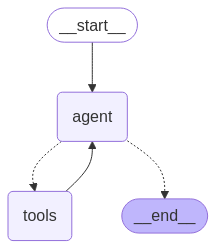

In [32]:
agent

In [33]:
response = agent.invoke({"messages": [{"role": "user", "content": "What is LangGraph?"}]})

In [34]:
response

{'messages': [HumanMessage(content='What is LangGraph?', additional_kwargs={}, response_metadata={}, id='991e51f8-2257-4c86-8566-6f88c7ac4c65'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_4JeDndnL8iwIsU2eKactLLMA', 'function': {'arguments': '{"query":"LangGraph"}', 'name': 'tavily_search'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 18, 'prompt_tokens': 772, 'total_tokens': 790, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_a6889ffe71', 'id': 'chatcmpl-BP1lJYPSxOcYyAz7rMz0MKBZo4DmN', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-c0f36cb6-1ef9-4cf4-b62f-02a08a1cfbb6-0', tool_calls=[{'name': 'tavily_search', 'args': {'query': 'LangGraph'}, 'id': 'call_4JeDndnL8iwIsU2eKactLLMA', '